# Processing Data and Creating Model

In [38]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Read the csv file into a pandas DataFrame
songs_df = pd.read_csv(Path("Resources/spotify_songs.csv"))

# Review the DataFrame
songs_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Cleaning

In [3]:
songs_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
# Include artist's name
# clean_songs_df = songs_df[['track_id','track_artist','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'duration_ms','track_popularity']]
# clean_songs_df.index = clean_songs_df["track_id"]
# clean_songs_df = clean_songs_df.drop("track_id", axis=1)
# clean_songs_df.head()
# clean_songs_df = pd.get_dummies(scaled_songs_df, dtype=int)
# clean_songs_df.head()

# Exclude artist's name, track_popularity
clean_songs_df = songs_df[['track_id','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
clean_songs_df.index = clean_songs_df["track_id"]
clean_songs_df = clean_songs_df.drop("track_id", axis=1)
clean_songs_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(clean_songs_df)
scaled_songs = scaler.transform(clean_songs_df)

In [7]:
scaled_songs_df = pd.DataFrame(scaled_songs,columns=clean_songs_df.columns, index=clean_songs_df.index)
scaled_songs_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874
0r7CVbZTWZgbTCYdfa2P31,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268
1z1Hg7Vb0AhHDiEmnDE79l,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017
75FpbthrwQmzHlBJLuGdC7,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750
1e8PAfcKUYoKkxPhrHqw4x,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172


## Finding K Value


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [9]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 15))

In [10]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_songs_df)
    inertia.append(k_model.inertia_)

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

In [11]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,393996.000000
1,2,349002.105176
2,3,321301.521937
3,4,300012.543051
4,5,281817.949299


In [12]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Model
* We use centroid methods `KMeans`, `Birch`, `Agglomoerative`, `GaussianMixture`
* Feel free to change the cluster number to see different results in cluster visualization

In [39]:
from sklearn.pipeline import Pipeline

In [13]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=7)

# Fit the model for the rate_df_scaled DataFrame
model.fit(scaled_songs_df)

# Save the predicted model clusters to a new DataFrame.
songs_clusters = model.predict(scaled_songs_df)

# View the country clusters
print(songs_clusters)

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 4 1 ... 2 2 0]


In [14]:
# Create a copy of the concatenated DataFrame
clustered_scaled_songs_df = scaled_songs_df.copy()

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
clustered_scaled_songs_df["songs_cluster"] = songs_clusters

# Review the DataFrame
clustered_scaled_songs_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,songs_cluster
track_id,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874,4
0r7CVbZTWZgbTCYdfa2P31,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268,4
1z1Hg7Vb0AhHDiEmnDE79l,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017,1
75FpbthrwQmzHlBJLuGdC7,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750,2
1e8PAfcKUYoKkxPhrHqw4x,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172,4


## Visualization Of Clustering

In [15]:
from sklearn.manifold import TSNE

In [16]:
m = TSNE(learning_rate=50)

In [17]:
tsne_features = m.fit_transform(scaled_songs_df)

In [18]:
tsne_features[1:4,:]

array([[  2.9503899,  28.305866 ],
       [-19.777706 , -27.539    ],
       [  9.205538 ,  28.934254 ]], dtype=float32)

In [19]:
clustered_scaled_songs_df["X"] = tsne_features[:,0]
clustered_scaled_songs_df["y"] = tsne_features[:,1]

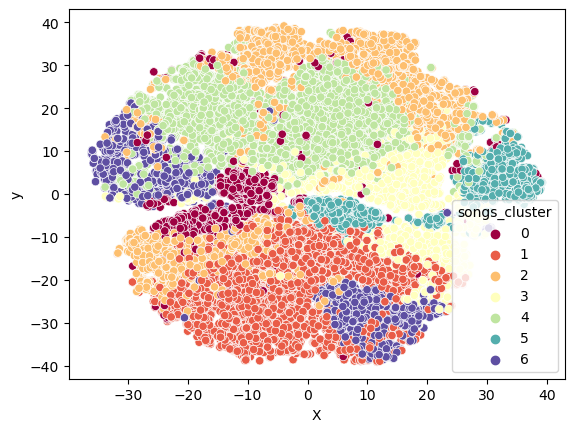

In [20]:
import seaborn as sns
sns.scatterplot(x="X", y="y", hue='songs_cluster', palette='Spectral', data=clustered_scaled_songs_df)
plt.show()

## Recommend User's Song

In [21]:
# Read the csv file into a pandas DataFrame
songs_2023_df = pd.read_csv(Path("Resources/top_50_2023.csv"),encoding="latin-1")

# Review the DataFrame
songs_2023_df.columns

Index(['artist_name', 'track_name', 'is_explicit', 'album_release_date',
       'genres', 'danceability', 'valence', 'energy', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key',
       'tempo', 'mode', 'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

### Choose Your Five Favorite Songs From The Dataframe

In [22]:
# Take the `audio feature` columns of the dataframe
songs_2023_df = songs_2023_df[['track_name','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
songs_2023_df

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Flowers,0.706,0.691,0,-4.775,1,0.0633,0.05840,0.000070,0.0232,0.632,118.048,200600
1,Kill Bill,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947
2,As It Was,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303
3,Seven (feat. Latto) (Explicit Ver.),0.790,0.831,11,-4.185,1,0.0440,0.31200,0.000000,0.0797,0.872,124.987,183551
4,Ella Baila Sola,0.668,0.758,5,-5.176,0,0.0332,0.48300,0.000019,0.0837,0.834,147.989,165671
5,Cruel Summer,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427
6,Creepin' (with The Weeknd & 21 Savage),0.715,0.620,1,-6.005,0,0.0484,0.41700,0.000000,0.0822,0.172,97.950,221520
7,Calm Down (with Selena Gomez),0.799,0.802,11,-5.196,1,0.0371,0.42900,0.001280,0.1710,0.811,107.008,239318
8,"Shakira: Bzrp Music Sessions, Vol. 53",0.778,0.632,2,-5.600,0,0.0493,0.27400,0.000000,0.0915,0.498,122.104,218289
9,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690


### Create Your Dataframe With The Five Chosen Songs

In [23]:
# Create a user's song list with `audio features`
my_list = songs_2023_df.iloc[[0,5,9,21,37],:]
my_list

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Flowers,0.706,0.691,0,-4.775,1,0.0633,0.0584,0.000070,0.0232,0.632,118.048,200600
5,Cruel Summer,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427
9,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
21,Starboy,0.679,0.587,7,-7.015,1,0.2760,0.1410,0.000006,0.1370,0.486,186.003,230453
37,Blank Space,0.753,0.678,5,-5.421,1,0.0644,0.0850,0.000002,0.1300,0.583,96.006,231827


In [24]:
# Compute the mean `audio features` of user's song 
my_list_feature = my_list.drop('track_name', axis=1).mean()
# Transform it into a dataframe
my_list_feature_df= pd.DataFrame(my_list_feature,)
# Transpose the dataframe into the correct format
my_list_feature_df = my_list_feature_df.transpose()
my_list_feature_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.6654,0.6602,5.0,-5.8978,1.0,0.12252,0.10628,0.00002,0.10744,0.5596,133.4118,208399.4


In [25]:
# Scale the user's song using `scaler`
scaled_my_list_feature = scaler.transform(my_list_feature_df)
scaled_my_list_feature_df = pd.DataFrame(scaled_my_list_feature,columns=my_list_feature_df.columns, index=my_list_feature_df.index)
scaled_my_list_feature_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.07272,-0.21237,-0.103686,0.274964,0.876177,0.152517,-0.31441,-0.377864,-0.536152,0.210339,0.465768,-0.290816


In [26]:
# Predict user's song cluster
my_cluster = model.predict(scaled_my_list_feature_df)
cluster_pred = my_cluster[0]
cluster_pred

4

## Recommendations
* We use KNN method for finding new song recommendations for the user

In [40]:
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline

In [27]:
# Find similar songs of the user's cluster
similar_songs = clustered_scaled_songs_df[clustered_scaled_songs_df["songs_cluster"]==cluster_pred]
similar_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,songs_cluster,X,y
track_id,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874,4,5.576981,25.447224
0r7CVbZTWZgbTCYdfa2P31,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268,4,2.950390,28.305866
1e8PAfcKUYoKkxPhrHqw4x,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172,4,-15.785479,23.355064
7fvUMiyapMsRRxr07cU8Ef,0.138889,1.218197,0.726971,0.446561,0.876177,0.196737,-0.434522,-0.377953,-0.305714,0.319286,0.152430,-1.048764,4,6.179111,26.715162
1IXGILkPm0tOCNeq00kCPa,-0.088567,0.659900,-0.934342,0.725306,0.876177,-0.740955,-0.540155,-0.377953,-0.636855,0.340732,0.151501,0.455270,4,-12.457915,23.712389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0SKDPFbwzzai7lBD5gwSns,0.903968,1.455888,0.450085,0.981966,0.876177,-0.423127,-0.781015,-0.370996,0.983857,-0.062455,0.264424,1.276003,4,2.439315,31.718260
6oP02i1hRc3Qp9bd36Ya3Z,-0.005855,0.621206,1.280742,0.653361,0.876177,-0.669888,-0.795467,-0.377953,0.283989,0.220633,0.152839,0.636607,4,13.107282,28.896570
5hxQjeuA2LfTtJ4WiJ0Ec9,-0.536586,0.538291,-1.488113,0.632949,0.876177,-0.761683,-0.756975,-0.377929,-0.480681,0.224923,0.264499,-0.228616,4,-12.954971,24.598246


In [29]:
# Take the `audo features` of the recommendation list
similar_songs_search = similar_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
similar_songs_search

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874
0r7CVbZTWZgbTCYdfa2P31,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268
1e8PAfcKUYoKkxPhrHqw4x,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172
7fvUMiyapMsRRxr07cU8Ef,0.138889,1.218197,0.726971,0.446561,0.876177,0.196737,-0.434522,-0.377953,-0.305714,0.319286,0.152430,-1.048764
1IXGILkPm0tOCNeq00kCPa,-0.088567,0.659900,-0.934342,0.725306,0.876177,-0.740955,-0.540155,-0.377953,-0.636855,0.340732,0.151501,0.455270
...,...,...,...,...,...,...,...,...,...,...,...,...
0SKDPFbwzzai7lBD5gwSns,0.903968,1.455888,0.450085,0.981966,0.876177,-0.423127,-0.781015,-0.370996,0.983857,-0.062455,0.264424,1.276003
6oP02i1hRc3Qp9bd36Ya3Z,-0.005855,0.621206,1.280742,0.653361,0.876177,-0.669888,-0.795467,-0.377953,0.283989,0.220633,0.152839,0.636607
5hxQjeuA2LfTtJ4WiJ0Ec9,-0.536586,0.538291,-1.488113,0.632949,0.876177,-0.761683,-0.756975,-0.377929,-0.480681,0.224923,0.264499,-0.228616


In [30]:
# Create a KNN model with finding 5 recommendation songs
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(similar_songs_search)

NearestNeighbors()

In [31]:
# Find the index of the 5 nearest songs to user's song (mean)
user_five_recommendations = neigh.kneighbors(scaled_my_list_feature_df, 5)
user_five_recommendations = user_five_recommendations[1][0]
user_five_recommendations

array([5938, 5839, 1346,  598,   32])

In [32]:
# Locate the five songs
user_five_song_list = similar_songs_search.iloc[user_five_recommendations,:]
user_five_song_list

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,
1KZyVnyptQcPzkx7ELCnZC,0.414593,0.090548,-0.103686,-0.215668,0.876177,-0.164521,-0.558822,-0.377953,-0.625838,-0.019563,0.521940,0.216388
70sKIAQgaVN2zWEEyOpyMZ,0.483519,0.040798,-0.103686,0.653696,0.876177,0.137514,0.080437,-0.377953,-0.526042,0.671002,-0.031191,-0.149179
1LWEjUzrngRXdUBaf7GWYI,-0.260882,-0.462222,-0.380571,0.067427,0.876177,-0.497155,-0.735028,-0.377953,-0.651111,0.229212,0.186478,-0.119813
3U1TuSqHIubBA10cVP7Sk6,-0.157493,-0.335085,0.450085,-0.003849,0.876177,-0.558352,-0.174538,-0.377953,-0.422358,0.272104,0.036682,-0.386622
18W92Zm1KjLCbUIszOhpkD,0.042393,0.145825,0.173200,0.622576,0.876177,-0.501103,-0.683123,-0.377953,-0.435319,0.405070,-0.035465,-0.465642


In [33]:
# Print out the song and artist of the recommendations
for index in user_five_song_list.index:
    track_name = songs_df[songs_df["track_id"]==index]["track_name"].values[0]
    track_artist = songs_df[songs_df["track_id"]==index]["track_artist"].values[0]
    print(f'Song: {track_name} \n Artist: {track_artist} \n ---------------------------------------------------')

Song: Hold Back The River 
 Artist: James Bay 
 ---------------------------------------------------
Song: All Night (BTS World Original Soundtrack) [Pt. 3] 
 Artist: BTS 
 ---------------------------------------------------
Song: She Sets The City On Fire 
 Artist: Gavin DeGraw 
 ---------------------------------------------------
Song: I Think I'm In Love 
 Artist: Kat Dahlia 
 ---------------------------------------------------
Song: I Wanna Know (feat. Bea Miller) 
 Artist: NOTD 
 ---------------------------------------------------


## Save The Model

In [35]:
import pickle

In [36]:
# save the song classification model as a pickle file
model_pkl_file = "song_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [37]:
# save the nearest neighbor model as a pickle file
neigh_pkl_file = "song_neighbor.pkl"  

with open(neigh_pkl_file, 'wb') as file:  
    pickle.dump(neigh, file)


# Supervised Learning

In [48]:
# Revisit the songs_df with cluster labels
songs_labeled_df = songs_df.copy()
songs_labeled_df["songs_cluster"] = songs_clusters

In [49]:
songs_labeled_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,songs_cluster
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,4
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,4
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2
